# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


###  Import Statements


In [28]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import normaltest



warnings.filterwarnings("ignore")

import matplotlib as mpl
#############  Plots Setup #####################
mpl.rcParams['figure.dpi'] = 120
plt.rcParams["font.family"] = "Ubuntu"
plt.style.use('C:\\Users\\Toumba\\Documents\\plotstyle.mplstyle')
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['xtick.major.size'] = 8 
plt.rcParams['ytick.major.size'] = 8 
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.size'] = 5 
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'
##################################################################################



def get_visualizations():

    '''
    This function is responsible for creating all the graphs needed in the EDA. It draws upon different dataframes created in the notebook. 
    '''
    
    sns.set_palette("bright")

    column_dict={'EARNINGS':'Hourly Wage ($)','S':'Years of Education','EXP':'Working Experience (years)'}
    for key in column_dict:
        plt.figure()    
        #plt.title(column_dict[key])         
        sns.distplot(df[key],hist=False,label='Overall')
        sns.distplot(df_black[key],hist=False,label='African-American')
        sns.distplot(df_hisp[key],hist=False,label='Hispanic')
        sns.distplot(df_white[key],hist=False,label='White')
        plt.legend(loc=(0.0,1.0),frameon=False,ncol=2)
        plt.xlabel(column_dict[key])



    for idx1,key1 in enumerate(column_dict):
        for idx2,key2 in enumerate(column_dict):
            if key1==key2:
                pass
            else:
                plt.figure()    
                #plt.title(column_dict[key])         
                sns.scatterplot(data=df,x=df[key1],y=df[key2],label='Overall')
                sns.scatterplot(data=df_white,x=df_white[key1],y=df_white[key2],label='White')
                sns.scatterplot(data=df_black,x=df_black[key1],y=df_black[key2],label='African-American')
                sns.scatterplot(data=df_hisp,x=df_hisp[key1],y=df_hisp[key2],label='Hispanic')
                plt.legend(loc=(0.0,1.0),frameon=False,ncol=2)
                plt.xlabel(column_dict[key1])
                plt.ylabel(column_dict[key2])


    ethnicity=['Overall','White','African-American','Hispanic']
    mean_overall=df.mean()
    mean_white=df_white.mean()
    mean_black=df_black.mean()
    mean_hisp=df_hisp.mean()
    std_overall=df.std()
    std_white=df_white.std()
    std_black=df_black.std()
    std_hisp=df_hisp.std()
    x_pos = np.arange(len(ethnicity)) ## array for the x positions in the bar chart

    for i in range(1,4):
        means=[mean_overall[i],mean_white[i],mean_black[i],mean_hisp[i]]
        stds=[std_overall[i],std_white[i],std_black[i],std_hisp[i]]

        fig, ax = plt.subplots()
        ax.bar(x=x_pos,height=means,yerr=stds,align='center',capsize=10,color=plt.cm.Dark2(np.linspace(0,1,len(ethnicity))))
        ax.set_ylabel(list(column_dict.values())[i-1])
        ax.set_xticks(x_pos)
        ax.set_xticklabels(ethnicity,rotation=45,ha='right')

def pred_residuals_violing(df):
    fig = px.scatter(
        df, x='prediction', y='residuals',
        marginal_y='violin',
        color='Set Split', trendline='ols', width=1500, height=1000
    )
    fig.update_layout(
        {
    'paper_bgcolor':'rgba(255,255,255, 1)',
    'plot_bgcolor':'rgba(255,255,255, 1)'
    },
        font_family="Courier New",
        font_color='black',
        font_size=25,
        xaxis_title='Prediction', 
        yaxis_title='Residuals'
    )
    fig.update_xaxes(showline=True, linewidth=2, gridwidth=2,gridcolor='black',linecolor='black',mirror=True,zeroline=True, zerolinewidth=2, zerolinecolor='black')
    fig.update_yaxes(showline=True, linewidth=2, gridwidth=2,gridcolor='black',linecolor='black',mirror=True,zerolinewidth=2, zerolinecolor='black')
    fig.show()

def check_normality(data):
    stat, p = normaltest(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')


## Notebook Presentation

In [29]:
pd.options.display.float_format = '{:,.2f}'.format ## keeps only 2 decimal digits

# Load the Data



In [30]:
df_data = pd.read_csv('NLSY97_subset.csv')




### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎




In [31]:
display(df_data.head())
print(df_data.shape)
display(df_data.columns)
display(df_data.info())

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


(2000, 96)


Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

None

In [32]:
'''  Keeping columns needed'''
df=df_data[['ID','EARNINGS','S','EXP','FEMALE','MALE','AGE','ETHBLACK','ETHHISP','ETHWHITE','EDUCPROF','EDUCPHD','EDUCMAST','EDUCBA','EDUCAA','EDUCHSD','EDUCGED','EDUCDO']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   AGE       2000 non-null   int64  
 7   ETHBLACK  2000 non-null   int64  
 8   ETHHISP   2000 non-null   int64  
 9   ETHWHITE  2000 non-null   int64  
 10  EDUCPROF  2000 non-null   int64  
 11  EDUCPHD   2000 non-null   int64  
 12  EDUCMAST  2000 non-null   int64  
 13  EDUCBA    2000 non-null   int64  
 14  EDUCAA    2000 non-null   int64  
 15  EDUCHSD   2000 non-null   int64  
 16  EDUCGED   2000 non-null   int64  
 17  EDUCDO    2000 non-null   int64  
dtypes: float64(2), int64(16)
memory usage: 281.4 KB


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [33]:
df_dupl=df.drop_duplicates()
df_clean=df_dupl.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1995
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1487 non-null   int64  
 1   EARNINGS  1487 non-null   float64
 2   S         1487 non-null   int64  
 3   EXP       1487 non-null   float64
 4   FEMALE    1487 non-null   int64  
 5   MALE      1487 non-null   int64  
 6   AGE       1487 non-null   int64  
 7   ETHBLACK  1487 non-null   int64  
 8   ETHHISP   1487 non-null   int64  
 9   ETHWHITE  1487 non-null   int64  
 10  EDUCPROF  1487 non-null   int64  
 11  EDUCPHD   1487 non-null   int64  
 12  EDUCMAST  1487 non-null   int64  
 13  EDUCBA    1487 non-null   int64  
 14  EDUCAA    1487 non-null   int64  
 15  EDUCHSD   1487 non-null   int64  
 16  EDUCGED   1487 non-null   int64  
 17  EDUCDO    1487 non-null   int64  
dtypes: float64(2), int64(16)
memory usage: 220.7 KB


### Creating dataframes for different ethnicities in order to use them in the Exploratory Data Analysis (EDA) later on

In [34]:
df_black=df_clean[df_clean['ETHBLACK']==1]
df_black.drop(['ETHWHITE','ETHHISP','ETHBLACK'],axis=1)
print(df_black.info())
df_hisp=df_clean[df_clean['ETHHISP']==1]
df_hisp.drop(['ETHWHITE','ETHHISP','ETHBLACK'],axis=1)
print(df_hisp.info())
df_white=df_clean[df_clean['ETHWHITE']==1]
df_white.drop(['ETHWHITE','ETHHISP','ETHBLACK'],axis=1)
print(df_white.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 19 to 1983
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        180 non-null    int64  
 1   EARNINGS  180 non-null    float64
 2   S         180 non-null    int64  
 3   EXP       180 non-null    float64
 4   FEMALE    180 non-null    int64  
 5   MALE      180 non-null    int64  
 6   AGE       180 non-null    int64  
 7   ETHBLACK  180 non-null    int64  
 8   ETHHISP   180 non-null    int64  
 9   ETHWHITE  180 non-null    int64  
 10  EDUCPROF  180 non-null    int64  
 11  EDUCPHD   180 non-null    int64  
 12  EDUCMAST  180 non-null    int64  
 13  EDUCBA    180 non-null    int64  
 14  EDUCAA    180 non-null    int64  
 15  EDUCHSD   180 non-null    int64  
 16  EDUCGED   180 non-null    int64  
 17  EDUCDO    180 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 26.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 en

## Descriptive Statistics

There are several interesting features to discuss. For example, in the overall dataset the number of female and male subjects seems to be well balanced since the mean and standard deviation are both 0.5 (in the male column 1 ==> male and 0 ==> female and vice versa). Something like that does not hold for the ethnicity groups and this is why we decided to look into that further. 

For example, the mean earning of an African-American are well below that of a White or Hispanic person even though the Years of Education (S) are similar.

Last but not least, the Pearson correlation shows a slight correlation between Hourly Wage and Years of Studying, but not between Hourly Wage and Years of Experience, this might affect the model's performance later on.

In [35]:
print('***** Overall ******')
display(df.describe())
print('***** African-American ******')
display(df_black.describe())
print('***** White ******')
display(df_white.describe())
print('***** Hispanic ******')

display(df_hisp.describe())
print("**** Pearson Correlation of Earnings with the rest of the features ****")
display(df.corr()['EARNINGS'])

***** Overall ******


,ID,EARNINGS,S,EXP,FEMALE,MALE,AGE,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00"
mean,"3,530.89",18.87,14.58,6.72,0.50,0.50,28.95,0.12,0.12,0.76,0.02,0.00,0.08,0.31,0.09,0.39,0.07,0.04
std,"2,023.07",11.95,2.74,2.84,0.50,0.50,1.39,0.33,0.32,0.43,0.12,0.04,0.27,0.46,0.29,0.49,0.26,0.19
min,1.00,2.00,6.00,0.00,0.00,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,825.00",11.54,12.00,4.69,0.00,0.00,28.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,471.50",15.75,15.00,6.63,0.50,0.50,29.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"5,158.25",22.70,16.00,8.70,1.00,1.00,30.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,31.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


***** African-American ******


,ID,EARNINGS,S,EXP,FEMALE,MALE,AGE,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO
count,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00
mean,"3,740.49",15.43,14.17,6.20,0.58,0.42,29.08,1.00,0.00,0.00,0.01,0.00,0.07,0.24,0.07,0.42,0.12,0.06
std,"2,132.70",8.90,2.87,2.55,0.50,0.50,1.40,0.00,0.00,0.00,0.07,0.00,0.26,0.43,0.26,0.50,0.33,0.24
min,28.00,2.26,8.00,0.00,0.00,0.00,27.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,846.75",9.44,12.00,4.63,0.00,0.00,28.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,747.50",12.87,14.00,6.06,1.00,0.00,29.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"5,631.00",18.82,16.00,7.75,1.00,1.00,30.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
max,"8,924.00",50.00,20.00,13.92,1.00,1.00,31.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00


***** White ******


,ID,EARNINGS,S,EXP,FEMALE,MALE,AGE,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO
count,"1,138.00","1,138.00","1,138.00","1,138.00","1,138.00","1,138.00","1,138.00","1,138.00","1,138.00","1,138.00","1,138.00","1,138.00","1,138.00","1,138.00","1,138.00","1,138.00","1,138.00","1,138.00"
mean,"3,579.10",19.42,14.76,6.71,0.48,0.52,28.91,0.00,0.00,1.00,0.02,0.00,0.09,0.33,0.09,0.37,0.06,0.03
std,"1,929.79",12.40,2.74,2.85,0.50,0.50,1.39,0.00,0.00,0.00,0.13,0.06,0.28,0.47,0.29,0.48,0.24,0.18
min,1.00,2.00,6.00,0.00,0.00,0.00,27.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,090.50",12.00,12.00,4.65,0.00,0.00,28.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,358.00",16.33,15.00,6.64,0.00,1.00,29.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"5,179.75",23.48,17.00,8.71,1.00,1.00,30.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,31.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


***** Hispanic ******


,ID,EARNINGS,S,EXP,FEMALE,MALE,AGE,ETHBLACK,ETHHISP,ETHWHITE,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO
count,169.00,169.00,169.00,169.00,169.00,169.00,169.00,169.00,169.00,169.00,169.00,169.00,169.00,169.00,169.00,169.00,169.00,169.00
mean,"3,125.88",18.29,13.63,7.17,0.46,0.54,28.91,0.00,1.00,0.00,0.01,0.00,0.05,0.17,0.09,0.51,0.11,0.05
std,"2,335.39",11.52,2.60,3.12,0.50,0.50,1.34,0.00,0.00,0.00,0.08,0.00,0.23,0.38,0.29,0.50,0.31,0.23
min,4.00,4.29,8.00,0.62,0.00,0.00,27.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,883.00,12.00,12.00,4.73,0.00,0.00,28.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,339.00",15.38,13.00,7.25,0.00,1.00,29.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,"4,614.00",21.57,16.00,9.65,1.00,1.00,30.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
max,"8,956.00",100.00,20.00,14.42,1.00,1.00,31.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00


**** Pearson Correlation of Earnings with the rest of the features ****


ID         -0.16
EARNINGS    1.00
S           0.28
EXP        -0.01
FEMALE     -0.12
MALE        0.12
AGE         0.09
ETHBLACK   -0.11
ETHHISP    -0.00
ETHWHITE    0.08
EDUCPROF    0.17
EDUCPHD     0.04
EDUCMAST    0.15
EDUCBA      0.16
EDUCAA     -0.04
EDUCHSD    -0.15
EDUCGED    -0.15
EDUCDO     -0.07
Name: EARNINGS, dtype: float64

## Visualise the Features - Exporatory Data Analysis (EDA)

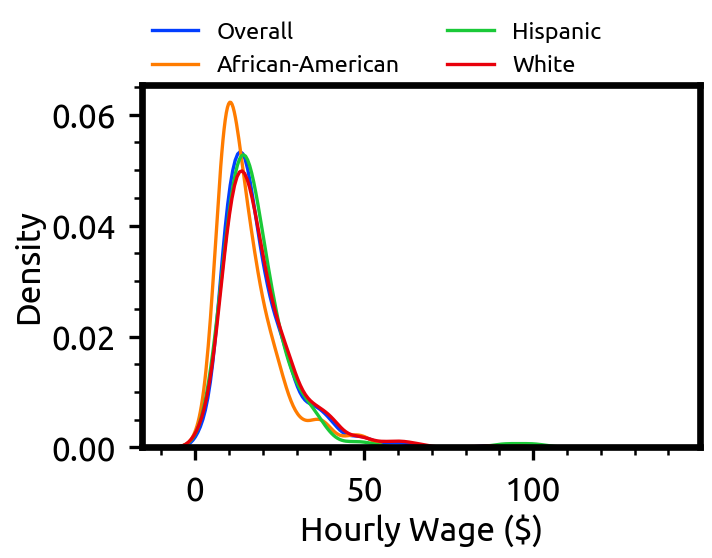

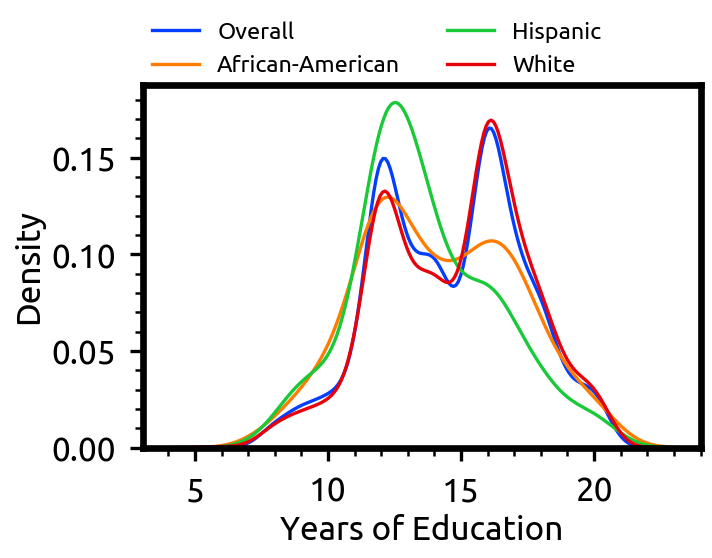

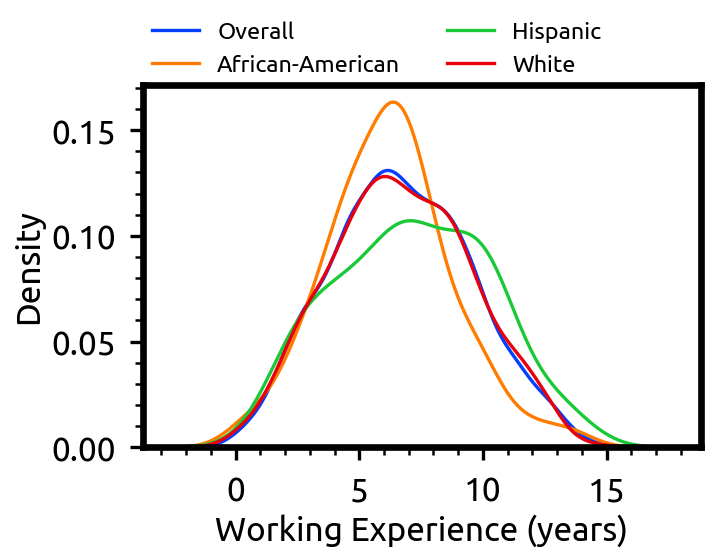

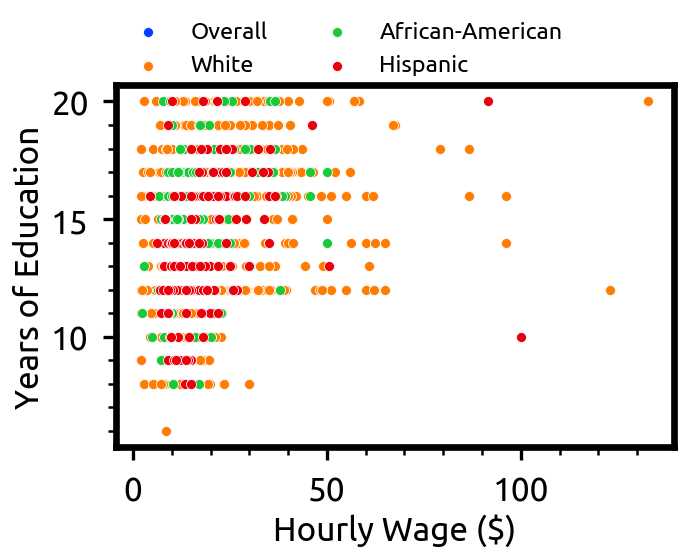

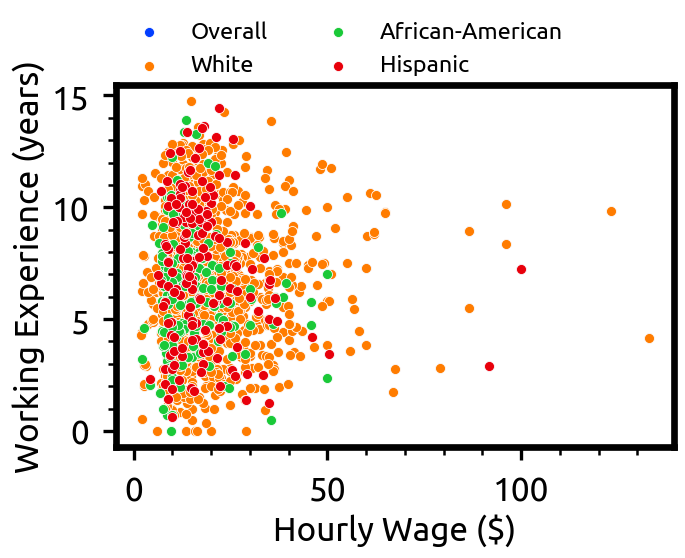

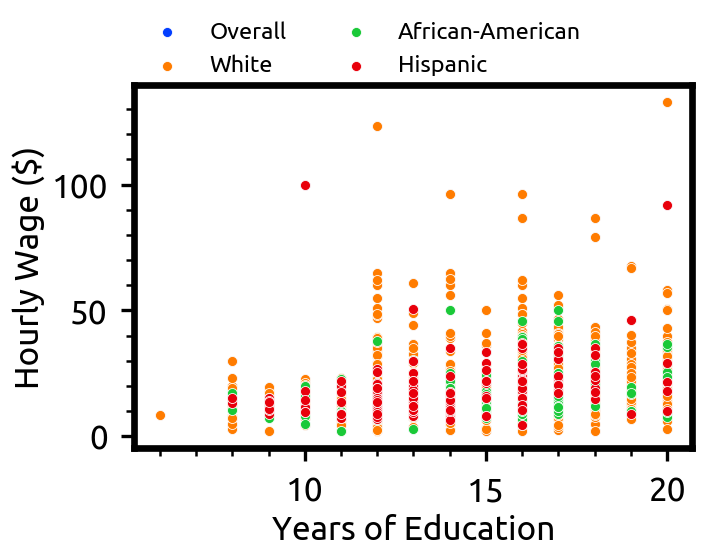

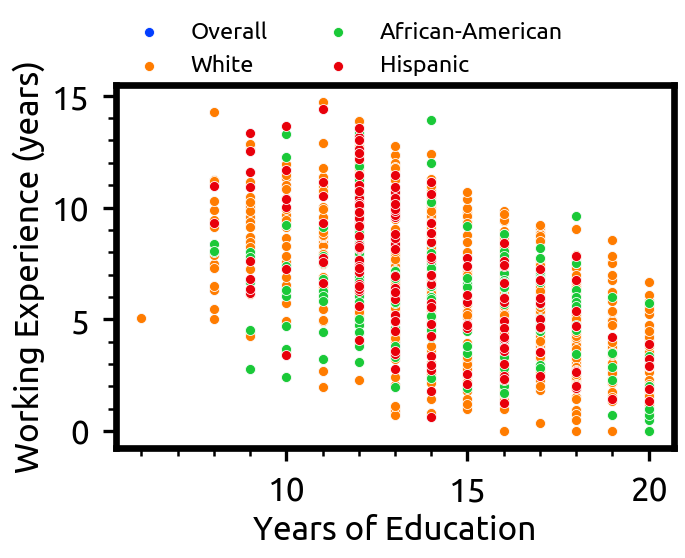

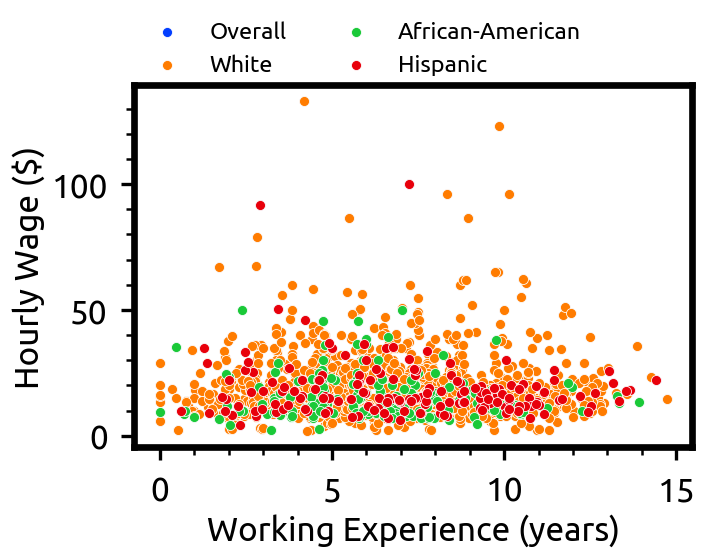

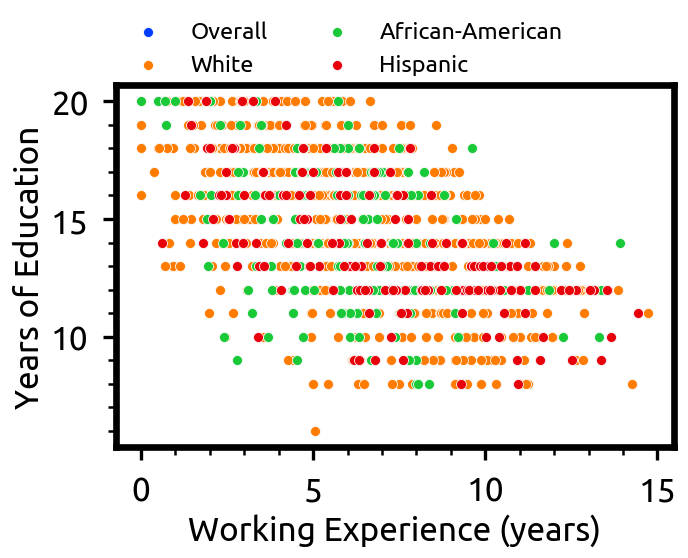

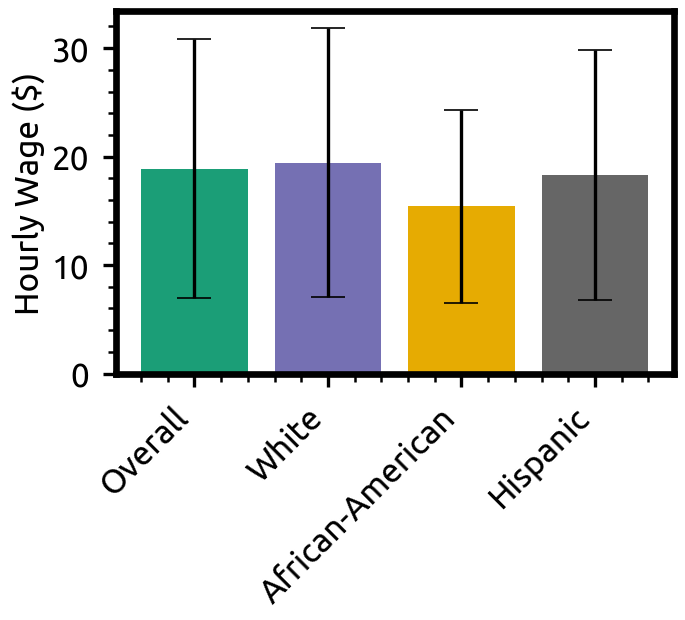

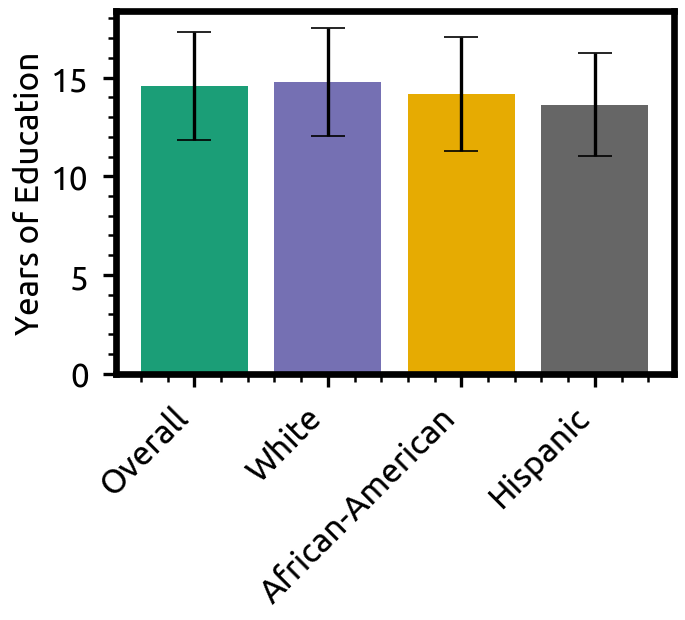

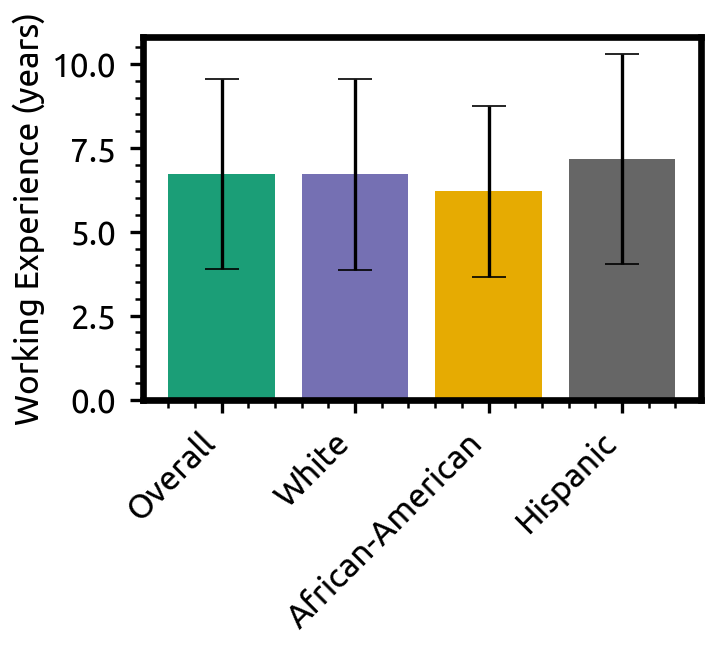

In [36]:
''' 
Here we check interesting correlations/statistics.
column_dict: dictionary to couple columns with titles and axes values 
get_visualizations() is a function to create all the graphs for the EDA
'''
get_visualizations() ## Improves readability of the notebook

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [37]:
training_idx, testing_idx = train_test_split(df.index, test_size=0.2, random_state=25)
print(f"No. of training examples: {training_idx.size}")
print(f"No. of testing examples: {testing_idx.size}")


No. of training examples: 1600
No. of testing examples: 400


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [38]:
df['Set Split'] = 'train'
x=df['S']
y=df['EARNINGS']
x_train=df.loc[training_idx, ['S']]
x_arr=x_train.to_numpy().reshape(-1,1)
y_train=df.loc[training_idx, ['EARNINGS']]
y_arr=y_train.to_numpy().reshape(-1,1)
df.loc[testing_idx, 'Set Split'] = 'test'
reg=LinearRegression()
reg.fit(x_arr,y_arr)
df['prediction']=reg.predict(x.to_numpy().reshape(-1,1))
df['residuals']=df['prediction']-df['EARNINGS']
print('R2=',reg.score(x_arr,y_arr))


R2= 0.08157764578504656


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

Positive coefficient --> Increase in Salary with years of schooling. 
With one extra year one seems to gain approximately 1.3 $ more. 

In [39]:
display(reg.coef_)
y_pred=reg.predict(x_train.to_numpy().reshape(-1,1))
rmse = mean_squared_error(y_arr, y_pred)
r2 = r2_score(y_arr, y_pred)
print('Root Mean Squared Error:',rmse)
print('R2:',r2)




array([[1.27831231]])

Root Mean Squared Error: 140.30609123727191
R2: 0.08157764578504656


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

Re: Residuals are not normally distributed and not independent and identically distributed. Moreover, the do not seems to have constant variance. 
This is double-checked (besides the visual check) with the D'Agostino and Pearson test (https://doi.org/10.2307/2335012) for normality. 

This might be improved with multiple linear regression (later on).

In [40]:
# RESIDUALS PLOT #
res_train=df.loc[training_idx, ['residuals']]
check_normality(res_train)
res_test=df.loc[testing_idx, ['residuals']]
check_normality(res_test)
pred_residuals_violing(df)




Statistics=1156.092, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=168.580, p=0.000
Sample does not look Gaussian (reject H0)


# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [41]:
df=df_data[['ID','EARNINGS','S','EXP','FEMALE','MALE','AGE','ETHBLACK','ETHHISP','ETHWHITE','EDUCPROF','EDUCPHD','EDUCMAST','EDUCBA','EDUCAA','EDUCHSD','EDUCGED','EDUCDO']]
df['Set Split'] = 'train'
df.loc[testing_idx, 'Set Split'] = 'test'

x=df.loc[:,['S','EXP']]
x_train=df.loc[training_idx, ['S','EXP']]
x_arr=x_train.to_numpy().reshape(-1,2)
y_train=df.loc[training_idx, ['EARNINGS']]
y_arr=y_train.to_numpy().reshape(-1,1)
df.loc[testing_idx, 'Set Split'] = 'test'
reg_mult=LinearRegression()
reg_mult.fit(x_arr,y_arr)
df['prediction']=reg_mult.predict(x.to_numpy().reshape(-1,2))
df['residuals']=df['prediction']-df['EARNINGS']
print('R2=',reg_mult.score(x_arr,y_arr))
df.info()


R2= 0.1124452802102468
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          2000 non-null   int64  
 1   EARNINGS    2000 non-null   float64
 2   S           2000 non-null   int64  
 3   EXP         2000 non-null   float64
 4   FEMALE      2000 non-null   int64  
 5   MALE        2000 non-null   int64  
 6   AGE         2000 non-null   int64  
 7   ETHBLACK    2000 non-null   int64  
 8   ETHHISP     2000 non-null   int64  
 9   ETHWHITE    2000 non-null   int64  
 10  EDUCPROF    2000 non-null   int64  
 11  EDUCPHD     2000 non-null   int64  
 12  EDUCMAST    2000 non-null   int64  
 13  EDUCBA      2000 non-null   int64  
 14  EDUCAA      2000 non-null   int64  
 15  EDUCHSD     2000 non-null   int64  
 16  EDUCGED     2000 non-null   int64  
 17  EDUCDO      2000 non-null   int64  
 18  Set Split   2000 non-null   object 
 19  pred

### Evaluate the Coefficients of the Model

There is a clear positive slope for both coefficients, which correspond to the slopes of the linear regression model fitted simultaneously on both variables.
Moreover, the R-Squared and RMSE are higher and lower, respectively, compared to the simple linear regression.

In [42]:
display(reg.coef_)
rmse = mean_squared_error(y_arr, reg_mult.predict(x_arr))
r2 = r2_score(y_arr,reg_mult.predict(x_arr))
print('Root Mean Squared Error:',rmse)
print('R2:',r2)

array([[1.27831231]])

Root Mean Squared Error: 135.59048614331394
R2: 0.1124452802102468


### Analyse the Estimated Values & Regression Residuals
The residuals are still not normally distributed, as they should for linear regression, however, the situation is much better now since they seem to be closer to the i.i.d (indepentently and identically distributed) assumption.

In [43]:

res_train=df.loc[training_idx, ['residuals']]
check_normality(res_train)
res_test=df.loc[testing_idx, ['residuals']]
check_normality(res_test)
pred_residuals_violing(df)


Statistics=1169.354, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=167.503, p=0.000
Sample does not look Gaussian (reject H0)


# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [45]:
# Prediction with simple linear regression
input_arr=np.array([16]).reshape(-1,1)
prediction=reg.predict(input_arr)
print('Hourly Wage should be:%.2f $'%prediction)

Hourly Wage should be:20.98 $


In [ ]:
# Prediction with multiple linear regression
input_arr=np.array([16,5]).reshape(-1,2)
prediction=reg_mult.predict(input_arr)
print('Hourly Wage should be: %.2f $'%prediction)

Hourly Wage should be:20.19 $


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 